In [42]:
#indepdent sdes implimentation 
import numpy as np
from model_2point import *




phiA= 0.5
phiB = 1-phiA
chi = 1.0
rho0 = 1.0
nx = 1000
zA = 1e3
zB = 1e3
tmax = 10
dt = 0.01
zetalist = [0.0,0.1,0.5,1,2,5,10,100]

# Generate arrays of complex numbers
wplus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
wplus = wplus-np.mean(wplus)
wminus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
w0 = np.vstack((wplus,wminus)).T
lambda_plus = 1.0
lambda_minus = 1.0
_model = model(chi,rho0,ensemble='grand')
_model.init_grandcanonical(zA,zB)
#model.dHw(w)

model_list = [_model.dHdw_compressible,_model.dHdw_weakcompressible,_model.dHdw_incompressible]
lambdat = np.array([lambda_plus,lambda_minus])
wlist = []
corrlist = []
for base in model_list:
    sde = sde_int(w0,base,_model.wick)
    w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
    corrlist.append(_model.getCorrelation_list(w))
wlist_zeta = []
corrlist_zeta = []
for zeta in zetalist:
    sde = _model.init_weakcompressible(zeta)

    sde = sde_int(w0,_model.dHdw_weakcompressible,_model.wick)
    w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
    corrlist_zeta.append(_model.getCorrelation_list(w))

Text(0, 0.5, '$\\det( \\left<\\delta\\rho_i \\delta\\rho_j\\right>-\\left<\\delta\\rho_i\\right> \\left< \\delta\\rho_j\\right>)$')

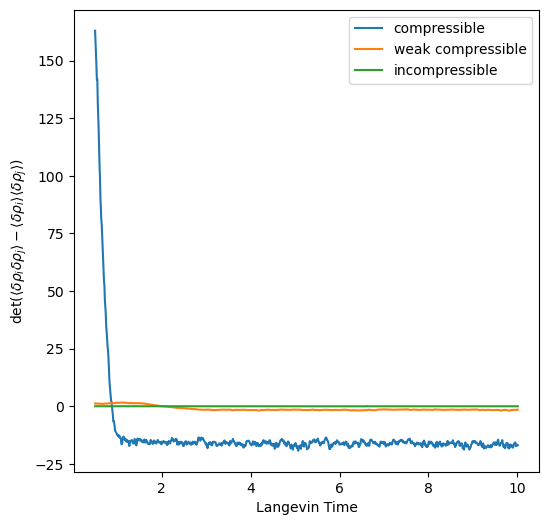

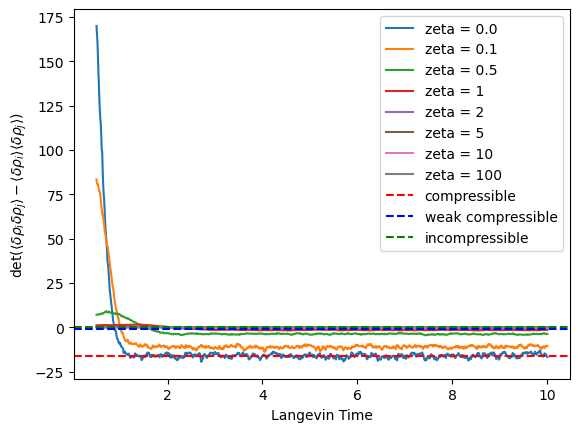

In [43]:
#process data get density profiles over time
# plot <density^2>-<density>^2
offset = 50
label = ['compressible','weak compressible','incompressible']
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))

for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:])/rho0,label = label[i])
plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
# plt.ylim(-10.0,5.0)



plt.figure()
for i in range(len(corrlist_zeta)):
    corr = np.array(corrlist_zeta[i])
    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:])/rho0,label = 'zeta = '+str(zetalist[i]))
offset = 100

color = ['r','b','g']
for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    plt.axhline(np.mean(np.linalg.det(corr[offset:,:,:])/rho0),label = label[i],linestyle = '--',color = color[i])

plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
# plt.ylim(-10.0,5.0)
    # plt.plot(t,corr[:,1,1])
    